In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
# Step 1: Read the Excel file into a pandas DataFrame
file_name = "Preboards 2.xlsx"
df = pd.read_excel(file_name)

In [6]:
# Print the column names in your DataFrame
print(df.columns)


Index(['NAME', 'SCHOOL', 'CODE', 'MATH', 'ELEX', 'GEAS', 'ESAT', 'AVE', 'Rank',
       'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')


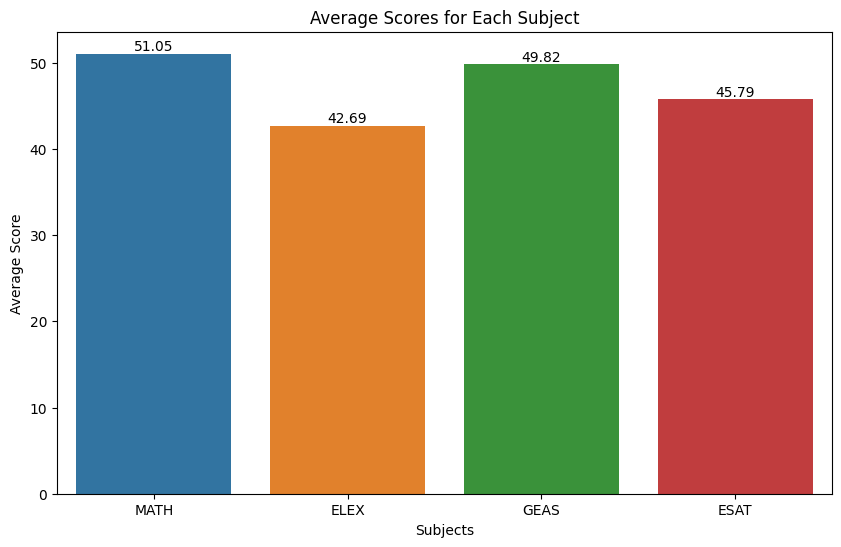

In [16]:
# Step 2: Plotting the graph with numerical values
subjects = ['MATH', 'ELEX', 'GEAS', 'ESAT']
df_avg_scores = df[subjects].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=subjects, y=df_avg_scores.values)
plt.title('Average Scores for Each Subject')
plt.xlabel('Subjects')
plt.ylabel('Average Score')

# Annotate each bar with its numerical value
for i, score in enumerate(df_avg_scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

plt.show()

In [12]:
# Step 3: Perform statistical analysis
# Drop rows with missing values in 'Math', 'Elex', 'GEAS', or 'ESAT' columns
df_cleaned = df.dropna(subset=['MATH', 'ELEX', 'GEAS', 'ESAT'])

# Define pairs of subjects for correlation analysis
subject_pairs = [('MATH', 'ELEX'), ('GEAS', 'ESAT'), ('MATH', 'GEAS')]

for subject1, subject2 in subject_pairs:
    # Calculate correlation between subject1 and subject2
    scores_subject1 = df_cleaned[subject1]
    scores_subject2 = df_cleaned[subject2]

    # Check if there are enough data points for the correlation calculation
    if len(scores_subject1) < 2 or len(scores_subject2) < 2:
        print(f"Insufficient data points to calculate correlation between {subject1} and {subject2}.")
    else:
        # Calculate Pearson correlation coefficient and p-value
        correlation_coefficient, p_value = stats.pearsonr(scores_subject1, scores_subject2)
        print(f"Correlation Coefficient ({subject1} vs {subject2}):", correlation_coefficient)
        print("P-value:", p_value)
        
        # Check for significance
        if p_value < 0.05:
            print(f"There is a significant correlation between {subject1} and {subject2} scores.")
        else:
            print(f"There is no significant correlation between {subject1} and {subject2} scores.")


Correlation Coefficient (MATH vs ELEX): 0.7751875408886844
P-value: 8.386683393902819e-80
There is a significant correlation between MATH and ELEX scores.
Correlation Coefficient (GEAS vs ESAT): 0.649538432804547
P-value: 2.4130854400111214e-48
There is a significant correlation between GEAS and ESAT scores.
Correlation Coefficient (MATH vs GEAS): 0.7586668860407997
P-value: 1.4007581508528014e-74
There is a significant correlation between MATH and GEAS scores.


In [15]:
# Step 4: Statistical overview of the data
stats_overview = df.describe()
print(stats_overview)


             MATH        ELEX        GEAS        ESAT         AVE       Rank  \
count  408.000000  396.000000  393.000000  397.000000  635.000000  22.000000   
mean    51.046569   42.691919   49.821883   45.793451   29.302677  10.500000   
std     12.206064   10.920242    9.119883    9.657397   23.412103   5.730038   
min     19.000000   20.000000   28.000000   23.000000    0.000000   1.000000   
25%     43.000000   35.000000   44.000000   39.000000    0.000000   6.250000   
50%     50.500000   41.000000   50.000000   44.000000   39.500000  10.500000   
75%     60.000000   48.000000   55.000000   51.000000   47.750000  14.750000   
max     88.000000   91.000000   86.000000   86.000000   84.300000  20.000000   

       Unnamed: 9  
count         0.0  
mean          NaN  
std           NaN  
min           NaN  
25%           NaN  
50%           NaN  
75%           NaN  
max           NaN  
